In [1]:
#cinematica de una particula en caida libre
aceleraciones = 10*rand(1,5)
t = 0:0.1:10
x = zeros(length(t),5)

for i in 1:length(t)
    for j in 1:length(aceleraciones)
        x[i,j] = 0.5*aceleraciones[j]*t[i]^2
    end
end

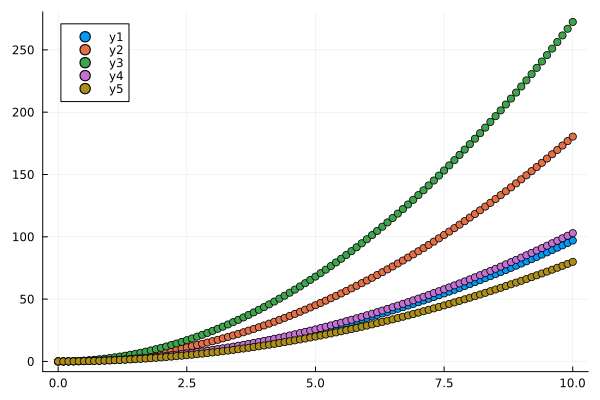

In [2]:
using Plots
scatter(t,x[:,1])
scatter!(t,x[:,2])
scatter!(t,x[:,3])
scatter!(t,x[:,4])
scatter!(t,x[:,5])

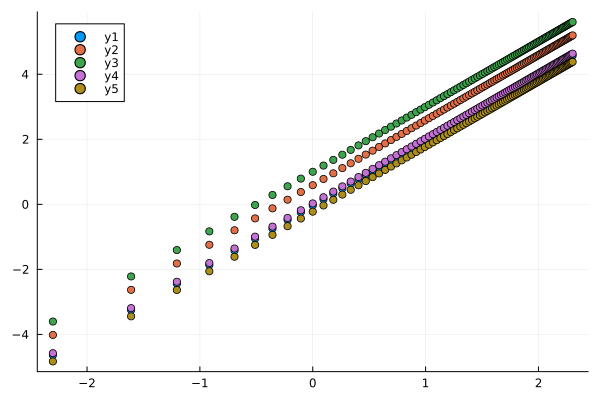

In [3]:
lt = log.(t)
lx = zeros(length(t),5)
for i in 1:length(t)
    for j in 1:length(aceleraciones)
        lx[i,j] = log(x[i,j])
    end
end

scatter(lt,lx[:,1])
scatter!(lt,lx[:,2])
scatter!(lt,lx[:,3])
scatter!(lt,lx[:,4])
scatter!(lt,lx[:,5])


In [4]:
acele = zeros(5)
for i in 1:5
    acele[i] = 2*exp(lx[11,i])
end

In [5]:
acele;

In [6]:
aceleraciones;

In [7]:
#Ecuacion de enfriamiento de Newton
T0 = 90; TA = 10; t = 0:10:2000; k = 0.00277  
T = TA.+ (T0-TA)*exp.(-k*t);

In [17]:
dK = rand(-277:277, 10)*1e-6
vectork = k.+dK;

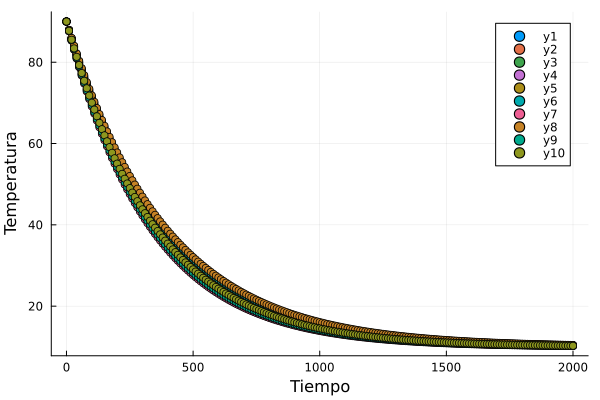

In [18]:
Tem = zeros(length(t),length(vectork))
y = zeros(length(t),length(vectork))
Kma = zeros(length(t),length(vectork))
vectorkexp = zeros(length(vectork))

for i in 1:length(t)
    for j in 1:length(vectork)
        Tem[i,j] = TA + (T0-TA)*exp(-vectork[j]*t[i])
        y[i,j] = log.((Tem[i,j]- TA)/(T0 - TA))
        Kma[i,j] = -y[i,j]/t[i]
    end
end

nuevotam = length(t) - 1
Km = zeros(nuevotam,length(vectork))

for i in 1:length(t)-1
    for j in 1:length(vectork)
        Km[i,j] = Kma[i+1,j]
    end
end

for i in 1:length(vectork)
    suma = 0
    for j in 1:length(t)-1
        suma += Km[j,i]
    end
    vectorkexp[i] = suma / (length(t) - 1)
end
scatter(t, Tem[:,1], xlabel = "Tiempo", ylabel = "Temperatura")
scatter!(t,Tem[:,2])
scatter!(t,Tem[:,3])
scatter!(t,Tem[:,4])
scatter!(t,Tem[:,5])
scatter!(t,Tem[:,6])
scatter!(t,Tem[:,7])
scatter!(t,Tem[:,8])
scatter!(t,Tem[:,9])
scatter!(t,Tem[:,10])

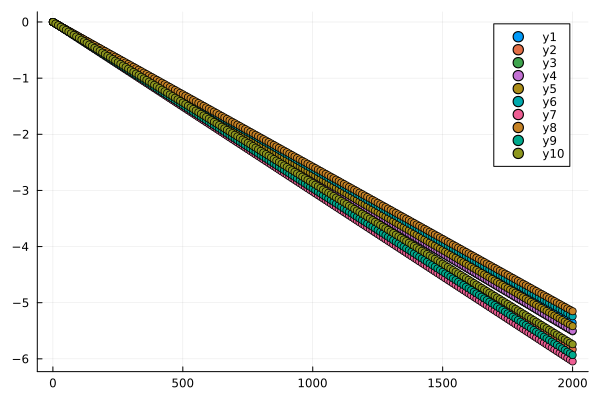

In [19]:
scatter(t, y[:,1])
scatter!(t,y[:,2])
scatter!(t,y[:,3])
scatter!(t,y[:,4])
scatter!(t,y[:,5])
scatter!(t,y[:,6])
scatter!(t,y[:,7])
scatter!(t,y[:,8])
scatter!(t,y[:,9])
scatter!(t,y[:,10])

In [20]:
errork = zeros(length(vectork))
for i in 1:length(vectork)
    errork[i] = (abs(vectork[i] - vectorkexp[i])) / vectork[i]
end
errork

10-element Vector{Float64}:
 2.105246936865057e-15
 2.0821440898212705e-15
 0.0
 2.8386384152347755e-15
 9.605334861444114e-16
 1.9855667409120264e-15
 4.303812791871007e-16
 4.04050499062921e-15
 4.24030519245848e-15
 0.0

In [21]:
vectork

10-element Vector{Float64}:
 0.002678
 0.0029159999999999998
 0.002755
 0.00275
 0.002709
 0.002621
 0.0030229999999999996
 0.0025759999999999997
 0.002966
 0.0028699999999999997

In [13]:
vectorkexp

10-element Vector{Float64}:
 0.002572999999999996
 0.0028679999999999916
 0.0028340000000000027
 0.002879999999999995
 0.0025180000000000085
 0.0030100000000000005
 0.0025780000000000095
 0.0030270000000000015
 0.002767000000000004
 0.002888999999999994